# Case Study on Probability for Data Science
## Problem Statement:
### To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
### (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
### Also, if some data pre-processing is necessary do that as well.

In [57]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms (1).csv


In [58]:
 # import necessary libraries and read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_set1=pd.read_csv('mushrooms.csv')
data_set1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [59]:
data_set1.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [60]:
data_set1.shape

(8124, 23)

The data set is having object values and it has 8124 rows and 23 columns

In [61]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [62]:
data_set1.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values present. So, the data set is a clean data set

As our Target field is class, we will find out what is the count of Edible(e) and Poisonous(p) mushrooms

In [63]:
data_set1['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

From the information, it is seen that all fields are having categorical values

In [64]:
data_set1 = data_set1.astype('category')
data_set1.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

## Data Preprocessing

As seen above, all the fields are having categorical data. Now, we can use LabelEncoder to make the columns into machine understandable format

In [65]:
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data_set1.columns:
    data_set1[column] = labelencoder.fit_transform(data_set1[column])

data_set1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


As the field veil-type has only one value, we can remove that as this will not contribute to the model.

In [66]:
data_set1 = data_set1.drop(["veil-type"],axis=1)

In [67]:
data_set1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


## Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


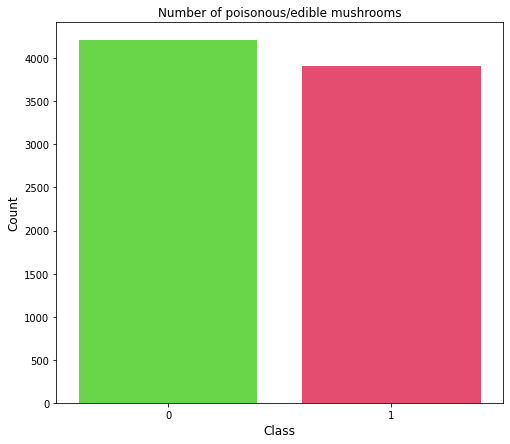

In [68]:
count = data_set1['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

Thus the data set is balanced as we have similar count of Poisonous and Edible mushrooms

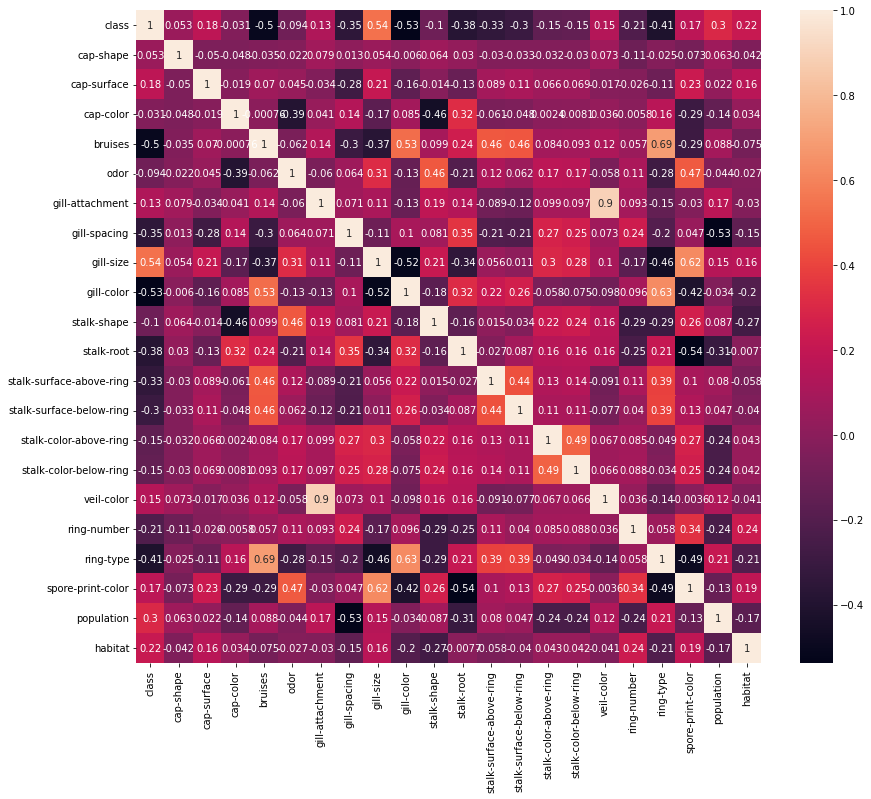

In [69]:
corr_matrix = data_set1.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot= True)

From the correlation matrix, we can see that the gill-color value is pretty less (-0.53), this can have high impact on classification.

Now, we can split the data set to training and testing set

In [70]:
X = data_set1.drop(['class'], axis=1)  
y = data_set1["class"]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

Now, we can do feature scaling

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[-0.23108882,  0.1369207 , -0.98259822, ...,  1.41971739,
         0.2873423 , -0.87717719],
       [ 1.01940764,  0.1369207 , -0.19967591, ...,  1.41971739,
         0.2873423 ,  1.44374884],
       [-0.85633705,  0.95105395, -0.98259822, ...,  1.41971739,
         0.2873423 ,  0.28328582],
       ...,
       [-0.85633705,  0.95105395, -0.19967591, ..., -0.25581597,
         1.08165859,  1.44374884],
       [-0.23108882,  0.1369207 , -0.98259822, ...,  1.41971739,
         0.2873423 ,  1.44374884],
       [-0.23108882, -1.4913458 , -0.59113706, ...,  1.41971739,
        -1.30129029, -0.29694568]])

## Classification Methods

## 1. Naive-Bayes' classification -Gaussian

In [73]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [74]:
# prediction of the test set result
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [75]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred) 

0.92

Thus the accuracy score of this model is 92%

In [76]:
cm

array([[767,  76],
       [ 54, 728]])

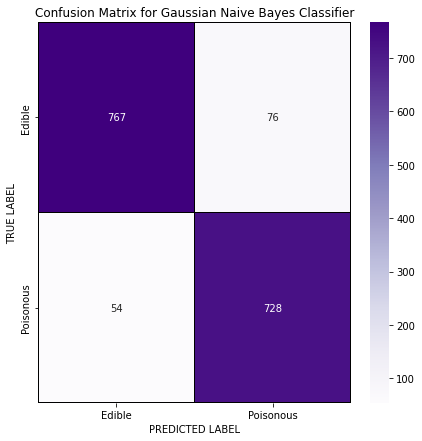

In [77]:

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier');
plt.show()

## 2. Naive-Bayes' classification - Bernoulli

In [78]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [79]:
# prediction of the test set result
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [80]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred) 

0.8953846153846153

Thus, the accuracy of the model is 89.53%

In [81]:
cm

array([[817,  26],
       [144, 638]])

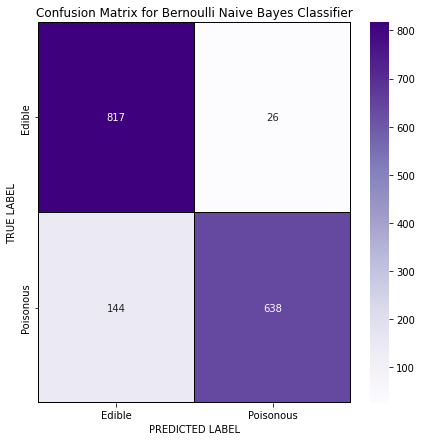

In [82]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier');
plt.show()

## 3. KNN Model

In [83]:
from sklearn.neighbors import KNeighborsClassifier
acc_values =[]
neighbors =np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors =k, metric='minkowski')
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)
acc_values 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9987692307692307]

Text(0, 0.5, 'accuracy')

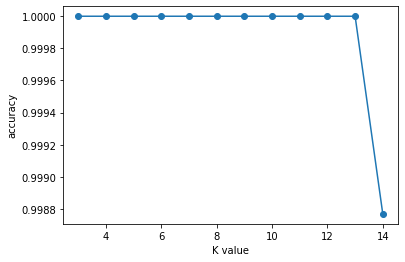

In [84]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K value')
plt.ylabel('accuracy')

### Accuracy is high for K values upto 13

In [85]:
classifier =KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred =classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 1.0


### As shown above, the accuracy of the model is 100%

In [86]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[843,   0],
       [  0, 782]])

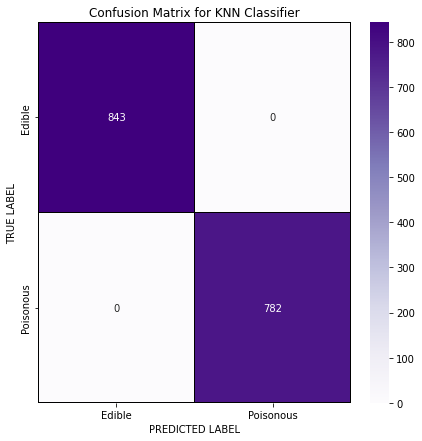

In [87]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier');
plt.show()

## 4. Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred=dt_model.predict(X_test)
print('Accuracy on Decision Tree model is', accuracy_score(y_test, y_pred))

Accuracy on Decision Tree model is 1.0


### As shown above, the accuracy of Decision Tree is 100%

In [90]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[843,   0],
       [  0, 782]])

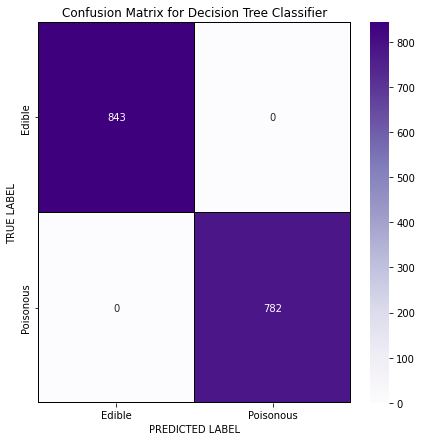

In [91]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier');
plt.show()

## 5. SVM Classification

In [92]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [93]:
y_pred = svm_linear.predict(X_test)
print('Accuracy on SVM model is', accuracy_score(y_test, y_pred))

Accuracy on SVM model is 0.9852307692307692


## The Accuracy of this model is 98.52 %

In [94]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[822,  21],
       [  3, 779]])

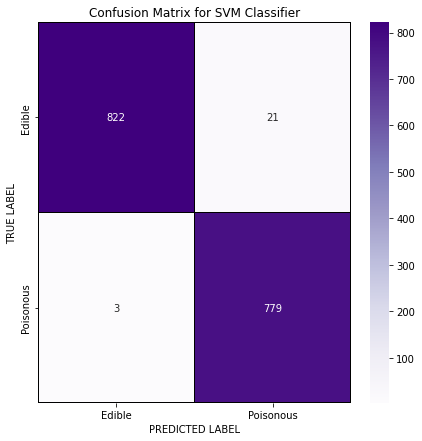

In [95]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier');
plt.show()

## 6. Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 1.0


In [97]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[843,   0],
       [  0, 782]])

### The accuracy of the model is 100%

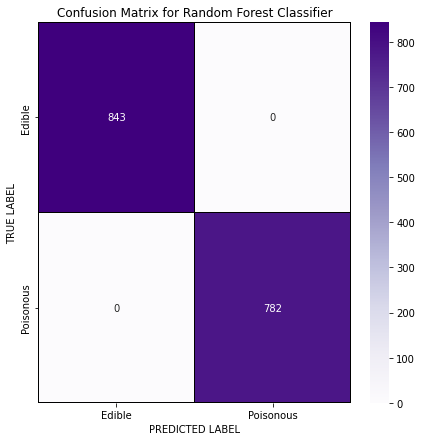

In [98]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
plt.show()

## 7. Logistic Regression 

In [99]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9556923076923077


## Accuracy is 95.57%

In [100]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[795,  48],
       [ 24, 758]])

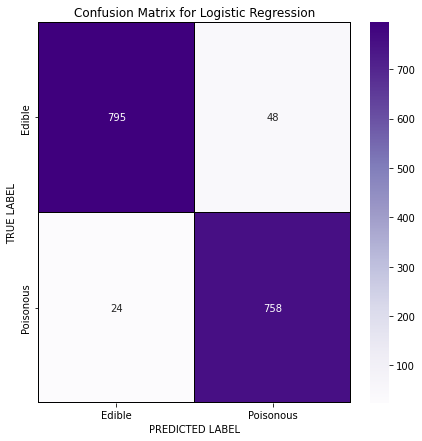

In [101]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression');
plt.show()

## When comparing the above classification models, the KNN Model, Decision Tree and Random Forest Classifier shows 100% accuracy.